In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, sqrt, mean, floor, log10
from scipy.optimize import curve_fit

In [2]:
#Messprotokoll
#4.2
I = np.loadtxt('ex4.2/meddark.txt', skiprows = 1)
T = np.loadtxt('ex4.2/darktemp.txt')
T+=273.15
Bias = np.loadtxt('ex4.2/medbias_n.txt', skiprows=1)
dBias= np.loadtxt('ex4.2/stdbias_n.txt', skiprows=1)

#4.3
x_I, N_I = np.loadtxt('ex 4.3/histogram_I.txt', unpack=True)
x_V, N_V = np.loadtxt('ex 4.3/histogram_V.txt', unpack=True)
x_R, N_R = np.loadtxt('ex 4.3/histogram_R.txt', unpack=True)

#4.4
t_I, n_I, dn_I = np.loadtxt('ex 4.4/exptime_I.txt'), np.loadtxt('ex 4.4/median_I.txt'), np.loadtxt('ex 4.4/stddev_I.txt')
t_V, n_V, dn_V = np.loadtxt('ex 4.4/exptime_V.txt'), np.loadtxt('ex 4.4/median_V.txt'), np.loadtxt('ex 4.4/stddev_V.txt')

#4.5
d2_r = np.loadtxt('readout_6.txt', skiprows=1)
d2_t = np.loadtxt('total_6.txt', skiprows=1)
N_6 = np.loadtxt('ex 4.5/signal_6.txt', skiprows=1)
d2_d = np.loadtxt('ex 4.5/div_6.txt', skiprows=1)

N = np.loadtxt('ex 4.5/mean_med.txt')
dN= np.loadtxt('ex 4.5/sigma_diff.txt', skiprows=1)


Eg = (1.202±0.006)eV
med-Bias start: 1437 ± 5
med-Bias end: 1346.0 ± 1.6


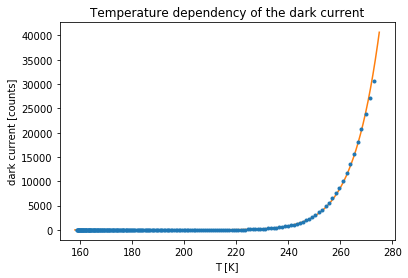

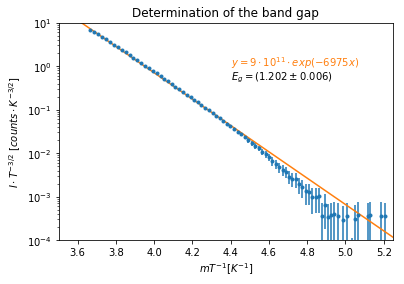

In [3]:
#4.2
k = 8.617e-5
x=np.linspace(158, 275, 1000)
x2=np.linspace(3.5e-3, 5.25e-3, 1000)
def Int1(t, c, Eg):
    return c*t**(3/2)*exp(-Eg/(2*k*t))
def Int2(t, c, Eg):
    return c*exp(-Eg*t/(2*k))

plt.figure()
plt.errorbar(T, I, yerr=sqrt(abs(I)), fmt='.')
popt, pcov = curve_fit(Int1, T, I, sigma=sqrt(abs(I)), p0=[7e11, 1.18])

plt.plot(x,Int1(x, *popt))
plt.title('Temperature dependency of the dark current')
plt.xlabel('T [K]')
plt.ylabel('dark current [counts]')
plt.savefig('diag1.pdf', format='PDF')

plt.figure()
plt.errorbar(1/T*1e3, I*T**(-3/2), yerr=sqrt(abs(I))*T**(-3/2), fmt='.')
popt2, pcov2 = curve_fit(Int2, 1/T, I*T**(-3/2), sigma=sqrt(abs(I))*T**(-3/2), p0=[1e10, 1.2])
plt.plot(x2*1e3,Int2(x2, *popt2))

Eg = round(popt2[1],3)
dEg= round(sqrt(pcov2[1,1]), 3)
co = popt2[0]

plt.annotate(r'$y={} \cdot 10^{{{}}} \cdot exp(-{}x)$'.format(int(round(co/10**floor(log10(co)), 2)), int(floor(log10(co))), int(floor(round(Eg/2/k)))), (4.4, 1), color='C1')
plt.annotate('$E_g = ({} \pm {})$'.format(Eg, dEg), (4.4,0.5))
plt.yscale('log')
plt.xlim(3.5, 5.25)
plt.ylim(1e-4, 10)
plt.title('Determination of the band gap')
plt.xlabel('$mT^{-1}$[$K^{-1}$]')
plt.ylabel(r'$I \cdot T^{-3/2}$ [$counts \cdot K^{-3/2}$]')
plt.savefig('diag2.pdf', format='PDF')


print('Eg = ({}±{})eV'.format(Eg, dEg))
print('med-Bias start: {} ± {}'.format(int(round(Bias[0])), int(round(dBias[0]))))
print('med-Bias end: {} ± {}'.format(round(Bias[-1], 1), round(dBias[-1], 1)))

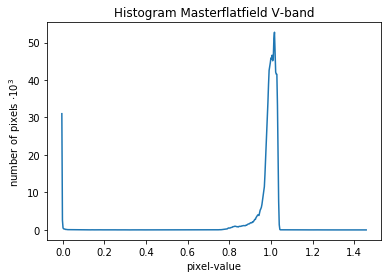

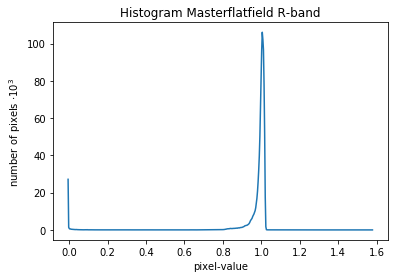

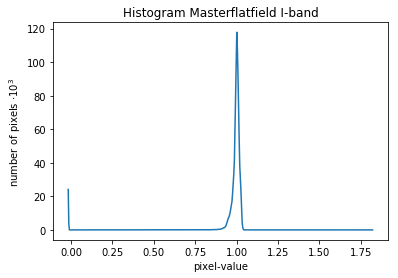

In [4]:
#4.3
plt.figure()
plt.errorbar(x_V, N_V/1e3)
plt.title('Histogram Masterflatfield V-band')
plt.xlabel('pixel-value')
plt.ylabel('number of pixels $\cdot 10^3$')
plt.savefig('histogram_V.pdf', format='PDF')

plt.figure()
plt.errorbar(x_R, N_R/1e3)
plt.title('Histogram Masterflatfield R-band')
plt.xlabel('pixel-value')
plt.ylabel('number of pixels $\cdot 10^3$')
plt.savefig('histogram_R.pdf', format='PDF')

plt.figure()
plt.errorbar(x_I, N_I/1e3)
plt.title('Histogram Masterflatfield I-band')
plt.xlabel('pixel-value')
plt.ylabel('number of pixels $\cdot 10^3$')
plt.savefig('histogram_I.pdf', format='PDF')

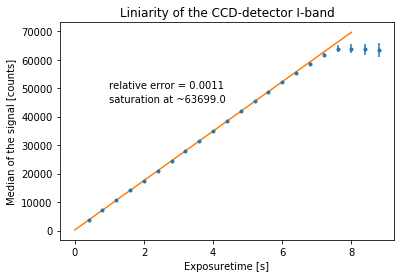

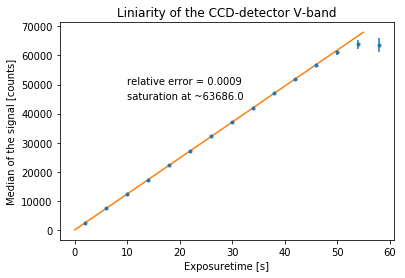

In [5]:
#4.4
plt.figure()
def lin(x, m, b):
    return m*x+b

x3 = np.linspace(0, 8, 100)
plt.errorbar(t_I, n_I, dn_I, fmt='.')
popt3, pcov3 = curve_fit(lin, t_I[:-4], n_I[:-4], sigma=dn_I[:-4])
plt.plot(x3, lin(x3, *popt3))
plt.annotate('relative error = {}'.format(round(sqrt(pcov3[0,0])/popt3[0], 4)), (1, 50e3))
plt.annotate('saturation at ~{}'.format(round(mean(n_I[-4:]))), (1, 45e3))
plt.title('Liniarity of the CCD-detector I-band')
plt.xlabel('Exposuretime [s]')
plt.ylabel('Median of the signal [counts]')
plt.savefig('liniarity_I.pdf', format='PDF')

plt.figure()
x4 = np.linspace(0, 55, 100)
plt.errorbar(t_V, n_V, dn_V, fmt='.')
popt4, pcov4 = curve_fit(lin, t_V[:-2], n_V[:-2], sigma=dn_V[:-2])
plt.plot(x4, lin(x4, *popt4))
plt.annotate('relative error = {}'.format(round(sqrt(pcov4[0,0])/popt4[0], 4)), (10, 50e3))
plt.annotate('saturation at ~{}'.format(round(mean(n_V[-2:]))), (10, 45e3))
plt.title('Liniarity of the CCD-detector V-band')
plt.xlabel('Exposuretime [s]')
plt.ylabel('Median of the signal [counts]')
plt.savefig('liniarity_V.pdf', format='PDF')


die Fehler:
d_e = 10.7
d_r = 5.0
d_PRNU = 9.0

Kappa für alle Aufnahmen nach (23):
[ -4.81519222e+02  -1.72047013e+03  -9.70434783e+03   6.28297030e+03
   3.45196078e+03   2.74769874e+03   2.62367509e+03   2.85856327e+03
   3.80271647e+03   5.45583272e+03   7.71903409e+03   9.89385475e+03
   1.36457917e+04   1.64914791e+04   2.28640167e+04   3.94367347e+04
  -2.04075000e+06  -1.93750000e+04  -2.93869955e+03  -2.81451180e+03
  -2.63457286e+03  -2.63457286e+03]

kappa nach (19), mit Eta = 1: 230.0


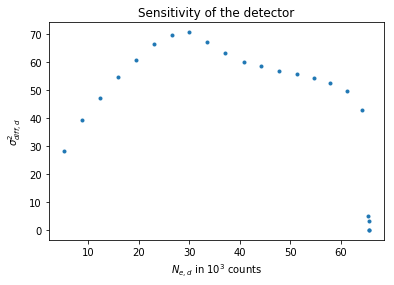

In [6]:
#4.5
#photon noise
d2_e = 2*d2_d-d2_r
d_e = sqrt(mean(d2_e))

#read-out noise
d_r = sqrt(mean(d2_r))

#PRNU noise
d2_PRNU = d2_t-d2_e-d2_r
d_PRNU = sqrt(mean(d2_PRNU))

print('die Fehler:')
print('d_e = {}'.format(round(d_e, 1)))
print('d_r = {}'.format(round(d_r, 1)))
print('d_PRNU = {}'.format(round(d_PRNU, 1)))
print()

def kap(n, div):
    return n/(div/2 - mean(d2_r))

plt.errorbar(N/1e3, dN, fmt='.')
plt.title('Sensitivity of the detector')
plt.xlabel('$N_{e,d}$ in $10^3$ counts')
plt.ylabel('$\sigma^2_{diff,d}$')
plt.savefig('sensitivity.pdf', format='PDF')

print('Kappa für alle Aufnahmen nach (23):')
print(kap(N, dN))
np.savetxt('kappa.txt', kap(N, dN))
print()

kappa1 = N_6/d2_e
print('kappa nach (19), mit Eta = 1:', round(mean(kappa1)))